In [1]:
# Dataset can be found here
# https://www.kaggle.com/city-of-seattle/seattle-crime-stats

# PSEUDO BRAINSTORM
## Questions I want to answer
- [x] Crime trend rate from 1990 - Present
- [ ] ~~Opiod influence on crimes~~ Unable to answer with dataset
- [x] Types of crime per year
- [ ] ~~Demographic information on crime~~ Unable to answer with dataset
- [X] Location data of crime

## Stretch
- ML/DL predict crime rates?

In [2]:
import pandas as pd

# Data Exploration

In [3]:
df_past = pd.read_csv('../input/seattle-crime-stats-by-1990-census-tract-1996-2007.csv')
df_present = pd.read_csv('../input/seattle-crime-stats-by-police-precinct-2008-present.csv')

# DF Past Column Explanataion
<img src="https://i.imgur.com/DiyXW33.png">

In [4]:
df_past.head()

,Report_Year,Census_Tract_1990,Crime_Type,Report_Year_Total
0,1996,1.0,Aggravated Assault,11
1,1996,1.0,Homicide,0
2,1996,1.0,NonResidential Burglary,41
3,1996,1.0,Property Crimes Total,430
4,1996,1.0,Rape,2


In [5]:
df_past.isna().sum()

Report_Year           0
Census_Tract_1990    32
Crime_Type            0
Report_Year_Total     0
dtype: int64

In [6]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

## Overall Crimes Committed 1996-2007

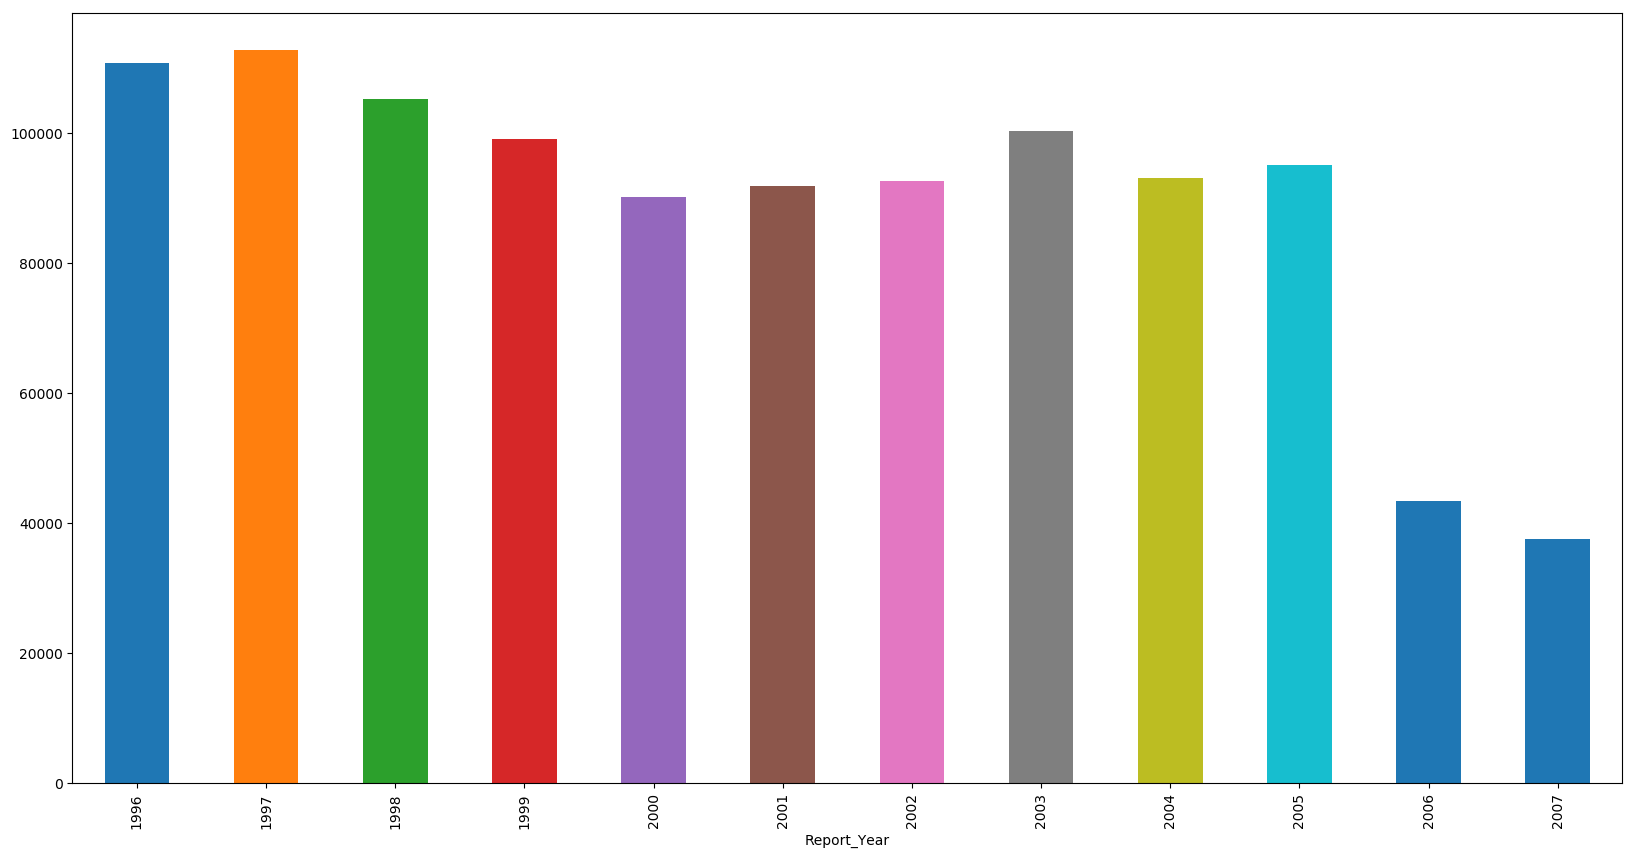

In [7]:
plt.figure(figsize=(20,10))
df_past.groupby('Report_Year')['Report_Year_Total'].sum().plot.bar()

## Overall Types of Crimes Committed 1996-2007

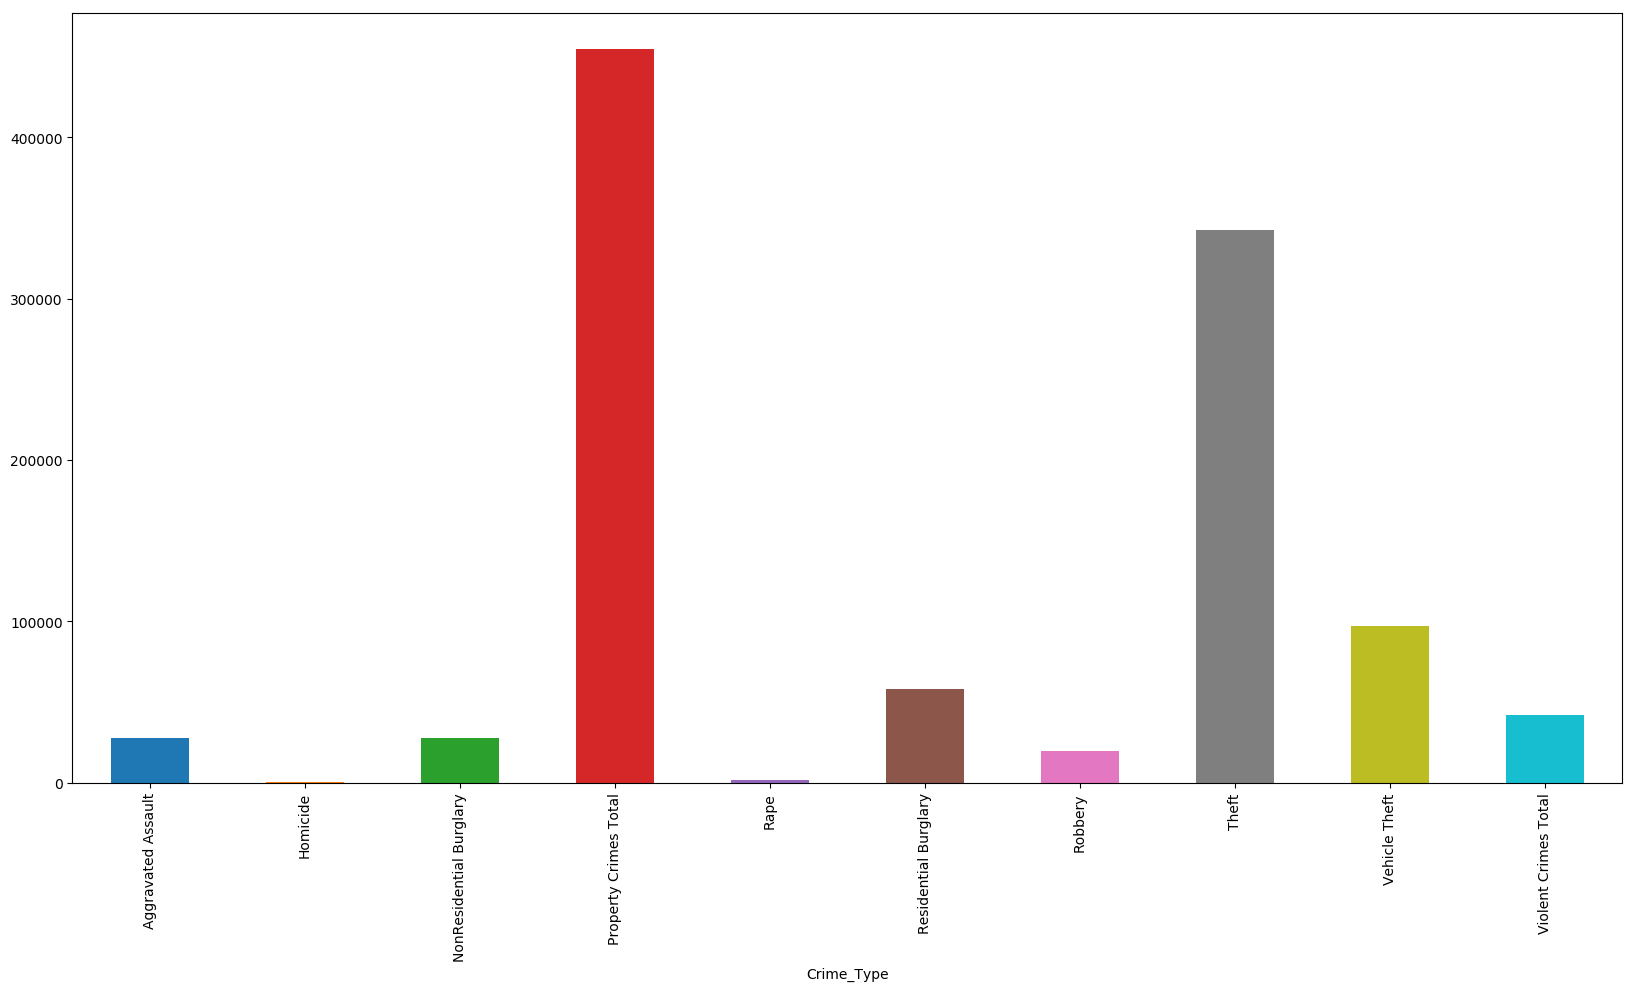

In [8]:
plt.figure(figsize=(20,10))
df_past.groupby('Crime_Type')['Report_Year_Total'].sum().plot.bar()

In [9]:
# Uncomment for quantitative version of above chart
# df_past.groupby('Crime_Type')['Report_Year_Total'].sum()

In [10]:
df_past_year = df_past['Report_Year'].astype(str)

# Crime Breakdowns by Year

In [11]:
# IMPORTANT
# df_past.groupby(['Crime_Type', 'Report_Year'])['Report_Year_Total'].sum()

# df_past.groupby(['Crime_Type', (df_past['Report_Year'] == 1997)])['Report_Year_Total'].sum()

query_df_past = pd.DataFrame(df_past.groupby(['Crime_Type', 'Report_Year'])['Report_Year_Total'].sum())

# Sanity checking for above code. There should be 49 homicides in 1997
# df_past[(df_past['Crime_Type'] == 'Homicide') & (df_past['Report_Year'] == 1997)]['Report_Year_Total'].sum()

### 1997

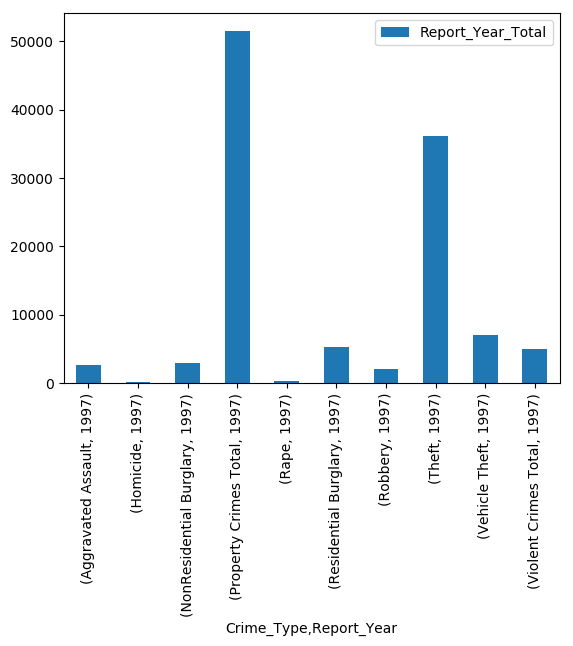

In [12]:
query_df_past.query('Report_Year == "1997"').plot.bar()

### 1998

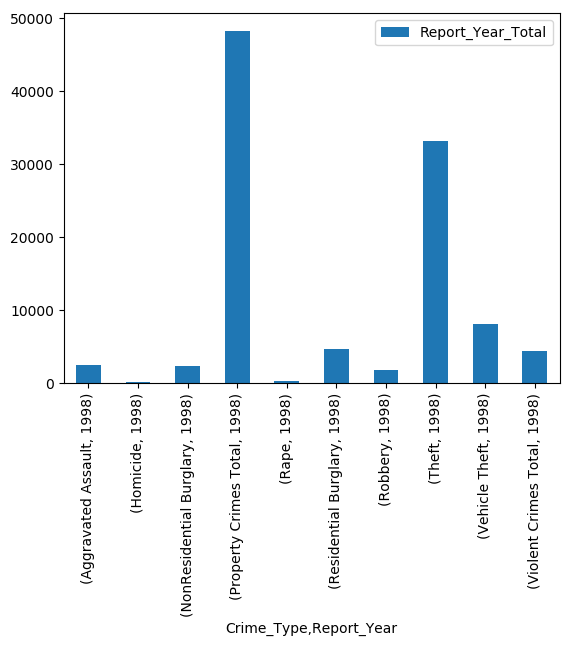

In [13]:
query_df_past.query('Report_Year == "1998"').plot.bar()

### 1999

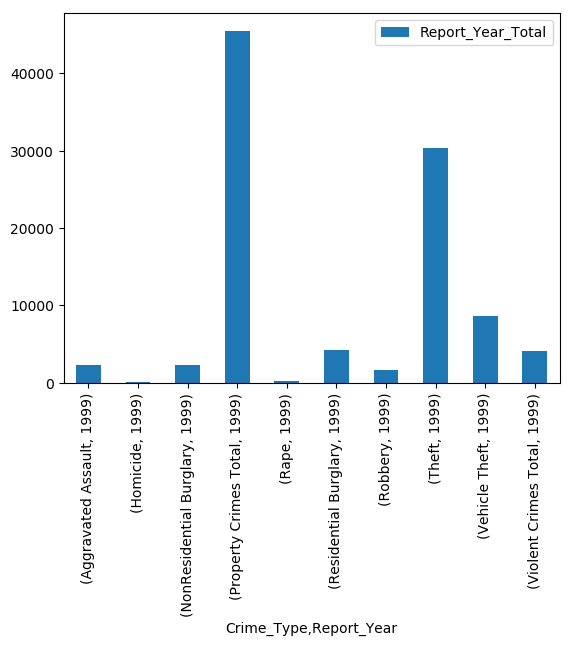

In [14]:
query_df_past.query('Report_Year == "1999"').plot.bar()

### 2000

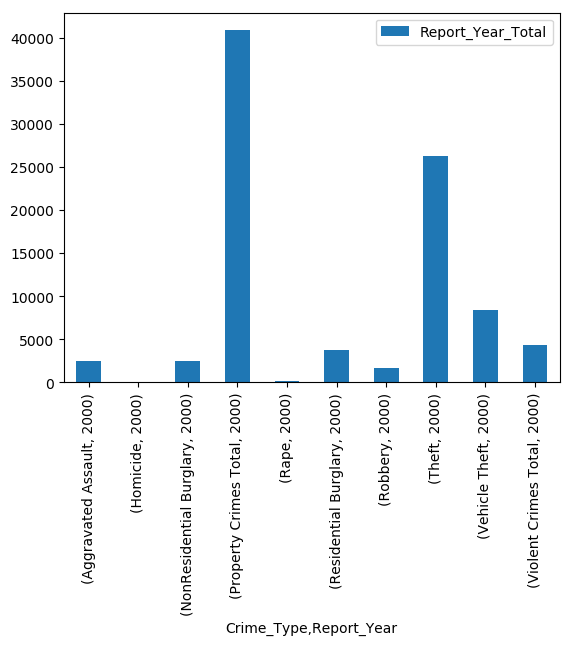

In [15]:
query_df_past.query('Report_Year == "2000"').plot.bar()

### 2001

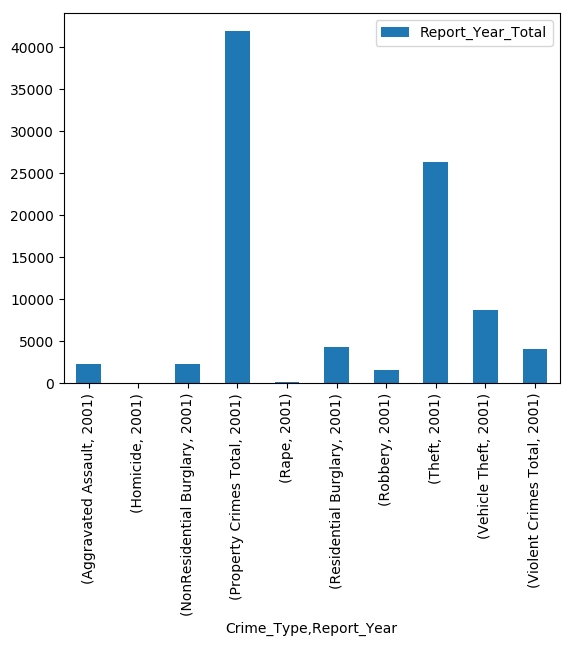

In [16]:
query_df_past.query('Report_Year == "2001"').plot.bar()

### 2002

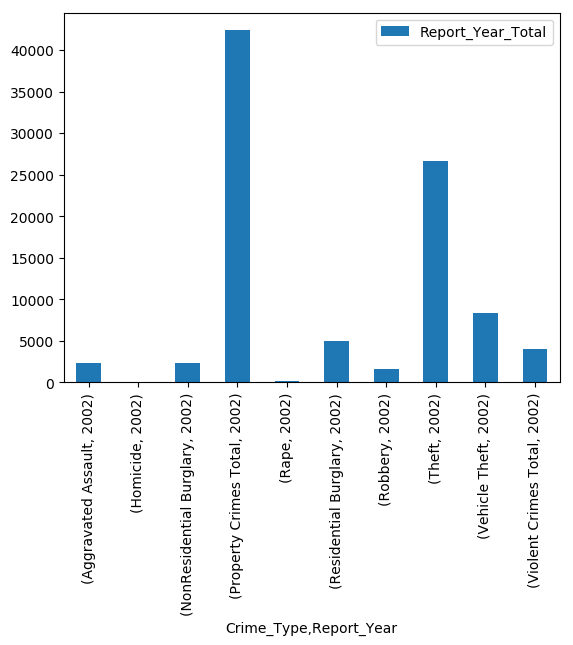

In [17]:
query_df_past.query('Report_Year == "2002"').plot.bar()

### 2003

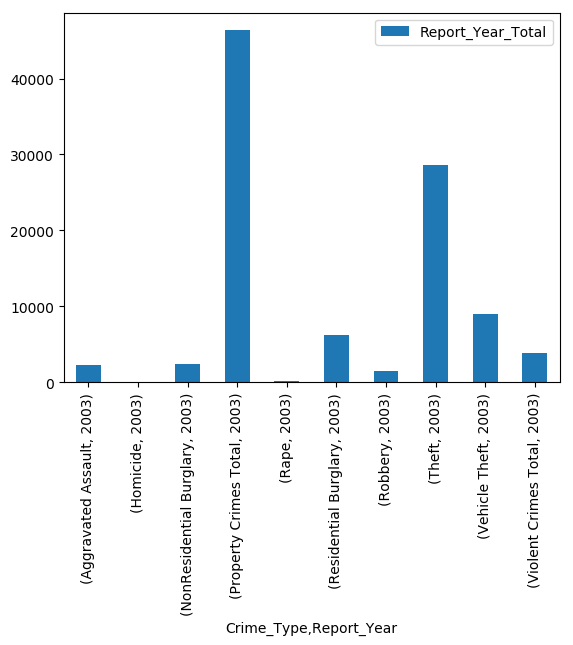

In [18]:
query_df_past.query('Report_Year == "2003"').plot.bar()

### 2004

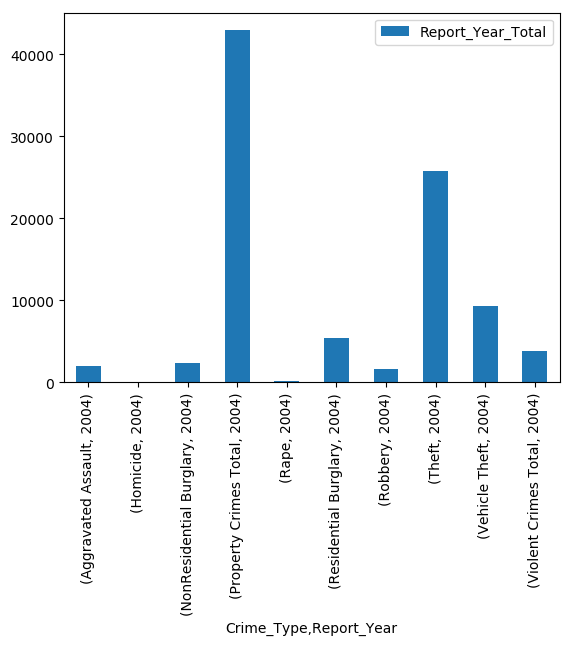

In [19]:
query_df_past.query('Report_Year == "2004"').plot.bar()

### 2005

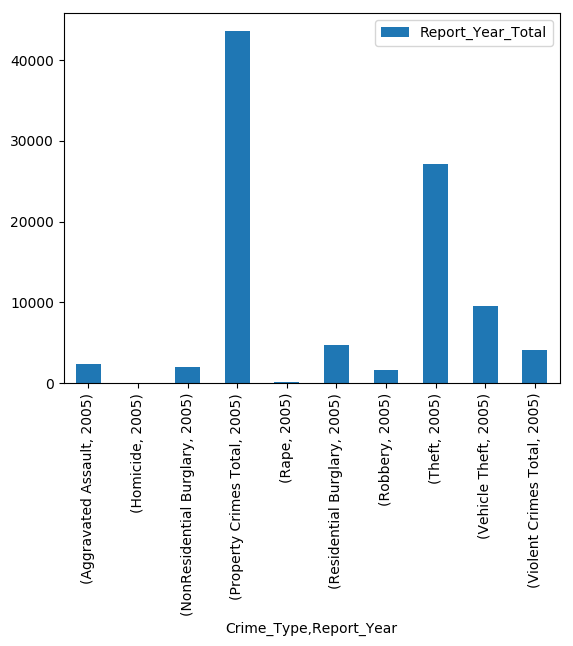

In [20]:
query_df_past.query('Report_Year == "2005"').plot.bar()

### 2006

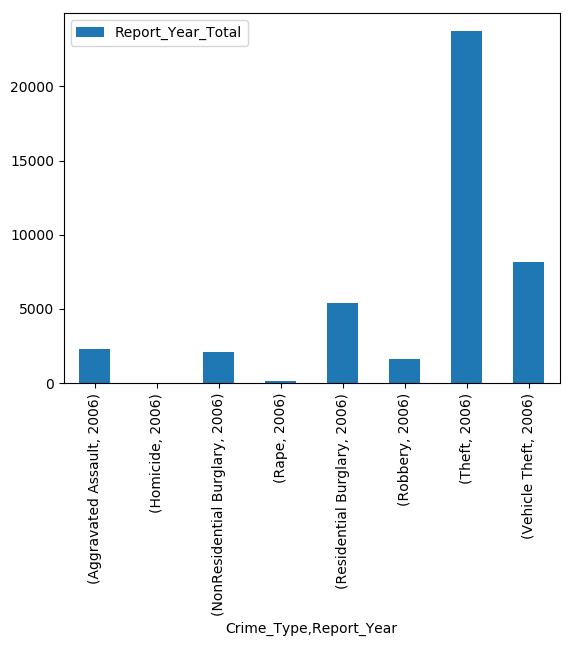

In [21]:
query_df_past.query('Report_Year == "2006"').plot.bar()

### 2007

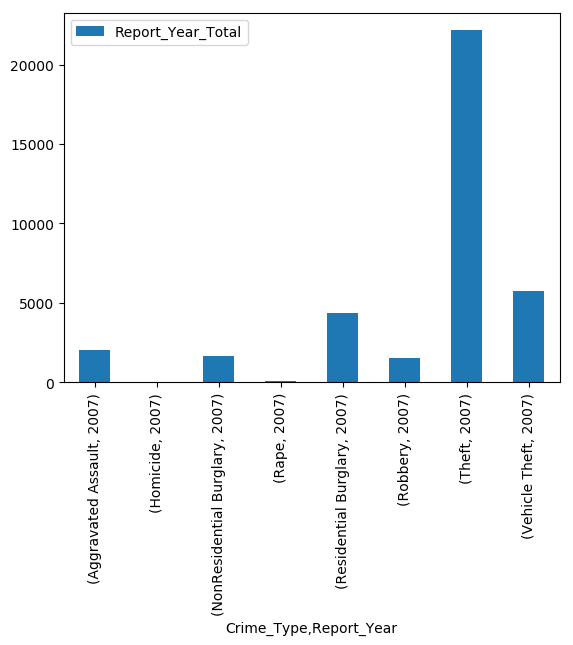

In [22]:
query_df_past.query('Report_Year == "2007"').plot.bar()

In [23]:
df_past.head()

,Report_Year,Census_Tract_1990,Crime_Type,Report_Year_Total
0,1996,1.0,Aggravated Assault,11
1,1996,1.0,Homicide,0
2,1996,1.0,NonResidential Burglary,41
3,1996,1.0,Property Crimes Total,430
4,1996,1.0,Rape,2


In [24]:
df_past['Census_Tract_1990'].unique()

array([  1.  ,  10.  , 100.  , 101.  , 102.  , 103.  , 104.  , 105.  ,
       106.  , 107.  , 108.  , 109.  ,  11.  , 110.  , 111.  , 112.  ,
       113.  , 114.  , 115.  , 116.  , 117.  , 118.  , 119.  ,  12.  ,
       120.  , 121.  ,  13.  ,  14.  ,  15.  ,  16.  ,  17.  ,  18.  ,
        19.  ,   2.  ,  20.  ,  21.  ,  22.  ,  23.98,  24.  ,  25.  ,
        26.  ,  27.  ,  28.  ,  29.  ,   3.  ,  30.  ,  31.  ,  32.  ,
        33.  ,  34.  ,  35.  ,  36.  ,  37.  ,  38.  ,  39.  ,   4.  ,
        40.98,  41.  ,  42.  ,  43.  ,  44.  ,  45.  ,  46.  ,  47.  ,
        48.  ,  49.  ,   5.  ,  50.  ,  51.  ,  52.  ,  53.01,  53.02,
        54.  ,  55.  ,  56.  ,  57.  ,  58.01,  58.02,  59.  ,   6.  ,
        60.  ,  61.  ,  62.  ,  63.  ,  64.  ,  65.  ,  66.  ,  67.98,
        68.98,  69.  ,   7.  ,  70.  ,  71.  ,  72.  ,  73.  ,  74.  ,
        75.  ,  76.  ,  77.  ,  78.  ,  79.  ,   8.  ,  80.  ,  81.  ,
        82.  ,  83.  ,  84.  ,  85.  ,  86.  ,  87.  ,  88.  ,  89.  ,
      

# Crime breakdown by census tract
### Trying to see if there's a correlation between location and types of crime

In [52]:
query_df_past = pd.DataFrame(df_past.groupby(['Crime_Type', 'Census_Tract_1990'])['Report_Year_Total'].sum())

In [53]:
query_df_past.head()

Report_Year_Total
Crime_Type         Census_Tract_1990                   
Aggravated Assault 1.0                              257
                   2.0                              101
                   3.0                               70
                   4.0                              295
                   5.0                               22

In [63]:
# 5 most active census tracts based on crime type
query_df_past.groupby('Crime_Type')['Report_Year_Total'].nlargest(5)

Crime_Type               Crime_Type               Census_Tract_1990
Aggravated Assault       Aggravated Assault       81.0                  2062
                                                  80.0                  1077
                                                  92.0                   928
                                                  118.0                  868
                                                  93.0                   658
Homicide                 Homicide                 81.0                    29
                                                  111.0                   18
                                                  94.0                    15
                                                  103.0                   14
                                                  72.0                    13
NonResidential Burglary  NonResidential Burglary  81.0                  1874
                                                  93.0                  1779
        

In [64]:
# Most active census tracts based on crime type
query_df_past.groupby('Crime_Type')['Report_Year_Total'].nlargest(5)

Crime_Type               Crime_Type               Census_Tract_1990
Aggravated Assault       Aggravated Assault       81.0                  2062
Homicide                 Homicide                 81.0                    29
NonResidential Burglary  NonResidential Burglary  81.0                  1874
Property Crimes Total    Property Crimes Total    81.0                 27915
Rape                     Rape                     81.0                   112
Residential Burglary     Residential Burglary     74.0                  1621
Robbery                  Robbery                  81.0                  2002
Theft                    Theft                    81.0                 27484
Vehicle Theft            Vehicle Theft            93.0                  2689
Violent Crimes Total     Violent Crimes Total     81.0                  3595
Name: Report_Year_Total, dtype: int64

# Conclusions:
- There is a correlation between census tracts and number of crimes. 8/10 of these crime types have one census tract in common - 81
- There was a significant drop in crime in 2006 onwards. This was notable because this year there were only 8/10 categories being kept track of. Most notably the 'Property Crimes' section, typically the most reported in previous years, was no longer being counted
  - Inconclusive as to whether those crimes were simply not being kept track of or redistributed to other categories. Perhaps there was a radical policy that significantly curbed crime overall?

# DF Present Column Explanataion

<img src="https://i.imgur.com/Bd6rpBn.png">

In [ ]:
df_present.head()